# Analyzing Movie Data From *The Movie Database*

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The aim of this project is to conduct an end-to-end analysis of a movies dataset provided by *The Movie Database*, with the goal of uncovering interesting insights that could be used to improve a movies' chances of success, as well as spotting key movie success indicators that can be useful information for streaming service providers and film production companies.

As mentioned above, the dataset being used is from *The Movie Database*, an open-source movies database containing millions of records for both movies and TV shows. The dataset includes information for movies such as popularity, budget, revenue, overview, runtime, genres, release year, vote average, and a few others.

Given the information provided, I will direct the flow and structure of the analysis by answering the two exploratory questions below:

**1. What are some common characteristics among the highest user-rated movies? (both)**

**2. If maximizing profitability is the end goal, how can a movie improve its chances of success? (film production companies)**

After cleaning the data in the 'Data Wrangling' section, to reach conclusions to these research questions, I will follow the following framework in the 'Exploratory Data Analysis' section:

1. Define variables to analyze
2. Perform any required data transformations/aggregations
3. Explore and visualize relationships and patterns

In [1]:
# Importing required packages and setting up in-cell visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Displays numbers in standard notation (rather than in scientific notation)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

**Data Dictionary**

`id`: A unique numerical identifier for each movie (useful just for the database) <br>
`imdb_id`: Same as above, but for imdb's website <br>
`popularity`: A numerical measure of a movie's popularity <br>
`budget`: A movie's budget <br>
`revenue`: A movie's total revenue <br>
`original_title`: Movie title <br>
`cast`: Movie cast <br>
`homepage`: Movie webpage, if it has one <br>
`director`: Movie director(s) <br>
`tagline`: Movie tagline <br>
`keywords`: A number of 'keywords' that represent what a movie is about <br>
`overview`: Movie overview/synopsis <br>
`runtime`: Movie runtime, in minutes <br>
`genres`: All the genres that define the movie <br>
`production_companies`: Movie production companies <br>
`release_date`: Movie release date <br>
`vote_count`: Number of user votes <br>
`vote_average`: Average score, from 0-10, of all the users' votes for a movie <br>
`release_year`: Movie release year <br>
`budget_adj`: Movie budget at 2010 dollars, adjusted for inflation <br>
`revenue_adj`: Movie revenue at 2010 dollars, adjusted for inflation <br>

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Loading in and examining the data set
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.986,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500,2015,137999939.280,1392445892.524
1,76341,tt1392190,28.420,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.100,2015,137999939.280,348161292.489


In [3]:
df.shape # Display dataset dimensions

(10866, 21)

The dataset contains 10866 movie records (rows) and 21 movie features (columns)

In [4]:
df.info() # Display high-level information of the dataset's structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.describe() # Display summary statistics of the dataset

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000,10866.000,10866.000,10866.000,10866.000,10866.000,10866.000,10866.000,10866.000,10866.000
mean,66064.177,0.646,14625701.094,39823319.793,102.071,217.390,5.975,2001.323,17551039.823,51364363.253
std,92130.137,1.000,30913213.831,117003486.582,31.381,575.619,0.935,12.813,34306155.723,144632485.040
min,5.000,0.000,0.000,0.000,0.000,10.000,1.500,1960.000,0.000,0.000
25%,10596.250,0.208,0.000,0.000,90.000,17.000,5.400,1995.000,0.000,0.000
50%,20669.000,0.384,0.000,0.000,99.000,38.000,6.000,2006.000,0.000,0.000
75%,75610.000,0.714,15000000.000,24000000.000,111.000,145.750,6.600,2011.000,20853251.084,33697095.717
max,417859.000,32.986,425000000.000,2781505847.000,900.000,9767.000,9.200,2015.000,425000000.000,2827123750.412


In [6]:
# Frequency table for movie runtime values, sorted
df.runtime.value_counts().sort_index(ascending=True)

0      31
2       5
3      11
4      17
5      17
       ..
561     1
566     1
705     1
877     1
900     1
Name: runtime, Length: 247, dtype: int64

In [7]:
print(f'There is {sum(df.duplicated())} duplicated row on the dataset')

There is 1 duplicated row on the dataset


In [8]:
df.budget.value_counts() # Budget distribution

0           5696
20000000     190
15000000     183
25000000     178
10000000     176
            ... 
51500000       1
25500000       1
1350000        1
7920000        1
4653000        1
Name: budget, Length: 557, dtype: int64

**Results from Dataset Quality Examination**:
- The column names are already in a clean, usable format, so there is no need to change those.
- To simplify and focus our analysis only on the elements that are of interest to us, we can drop certain columns that are unnecessary or that provide unwanted information. The most obvious columns to drop are 'budget', 'revenue', 'imdb_id', 'homepage', 'tagline', 'keywords' and 'overview'. The reason we are dropping 'budget' and 'revenue' is that the creators of the dataset have replaced those with 'budget_adj' and 'revenue_adj', as the former had outdated information.
- We can see with the `df.info()` command that there are a few columns with missing rows, so we will need to deal with these in our cleaning steps. Although there are a couple of columns with a very large number of missing information, they might be columns that do not provide any valuable information for our analysis, so we might drop them instead of having to deal with their missing data.
- There is only 1 duplicate row, which we can quickly get rid of in our cleaning process.
- All the column data types are in the correct format, so we do not need to fix those.
- There are movies which were recorded as having either a runtime, budget or revenue as 0. These would be impossible and should thus be considered inaccurate outliers that we should carefully remove from our analysis.

### Dropping unnecessary columns

In [9]:
# Drop unwanted columns from our dataframe. 
drop_columns = ['budget', 'revenue', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview']
df = df.drop(columns=drop_columns)
df.columns

Index(['id', 'popularity', 'original_title', 'cast', 'director', 'runtime',
       'genres', 'production_companies', 'release_date', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

### Removing duplicate rows

In [10]:
print(f'Data set dimensions before change: {df.shape}')
df = df.drop_duplicates()
print(f'Data set dimensions after change: {df.shape}') 

Data set dimensions before change: (10866, 14)
Data set dimensions after change: (10865, 14)


### Removing rows with missing data

In [11]:
print('# of rows with missing data per column (before change): ', df.isna().sum(), sep='\n')
df = df.dropna()
print('Number of rows with missing data per column (after change): ', df.isna().sum(), sep='\n')

# of rows with missing data per column (before change): 
id                         0
popularity                 0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64
Number of rows with missing data per column (after change): 
id                      0
popularity              0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64


### Removing 0 entries in 'runtime', 'budget_adj' and 'revenue_adj'

First, let's get a better understading of the value distributions in these columns.

In [12]:
print('Distribution for runtime: ', df.runtime.value_counts().sort_index(), sep='\n\n')

Distribution for runtime: 

0      13
3       6
4      11
5      12
6      15
       ..
500     1
540     1
566     1
705     1
877     1
Name: runtime, Length: 224, dtype: int64


In [13]:
print('Distribution for budget: ', df.budget_adj.value_counts().sort_index(), sep='\n\n')

Distribution for budget: 

0.000            4751
0.921               1
0.969               1
1.013               1
1.309               1
                 ... 
271692064.214       1
292050672.739       1
315500574.789       1
368371256.185       1
425000000.000       1
Name: budget_adj, Length: 2549, dtype: int64


In [14]:
print('Distribution for revenue:', df.revenue_adj.value_counts().sort_index(), sep='\n\n')

Distribution for revenue:

0.000             5022
2.371                1
2.862                1
5.927                1
6.951                1
                  ... 
1907005841.916       1
2167324901.200       1
2506405735.419       1
2789712242.277       1
2827123750.412       1
Name: revenue_adj, Length: 4742, dtype: int64


We can see from the frequency tables above that for the budget and revenue columns, there are an absurdly large number of entries with recorded values of 0 (4751 and 5022 respectively).

Considering that a main point of focus for this analysis is related to movie profitability, it is very important that the revenue and budget entries are correct. Thus, let's eliminate from our dataset all the entries from 'runtime', 'budget_adj' and 'revenue_adj' that are recorded as 0, as we are assuming they are incorrectly recorded.

**Note: I thought about taking the approach of labeling these 0 entries as 'unknown'. However, in order to maintain each column with only one data type, I will just remove these entries from our dataset.**

In [15]:
# Filter the dataset to exclude 0 entries in the runtime, budget_adj and revenue_adj columns
print('Dataset dimensions before change: ', df.shape) 
df = df[(df.runtime != 0) & (df.budget_adj != 0) & (df.revenue_adj != 0)] 
print('Dataset dimensions after change: ', df.shape)

Dataset dimensions before change:  (9772, 14)
Dataset dimensions after change:  (3805, 14)


### Cleaning Observations

**The Actions Taken:**

1. Dropped unwanted/unnecessary columns from our dataset.
2. Removed duplicate rows.
3. Removed rows with missing data.
4. Removed 0 entries from 'runtime', 'budget_adj' and 'revenue_adj' columns.

**The Results:**

The last step, which involved removing 0 entries, filtered down our dataset to only 3,805 rows. Although having less data is not ideal, it was a necessary step we needed to take in order to conduct an accurate movie profitability analysis with the data. Moreover, I am still left with a sample size of over 3 thousand, which should be large enough to spot interesting patterns.

We now have complete and accurate data for each of the 15 columns in our dataset.

Let's now move forward with out analysis by tackling the main questions posed in the introduction section.

<a id='eda'></a>
## Exploratory Data Analysis

### Q1. What are shared characteristics of highly rated movies?

**1. Define variables to analyze**

To answer this research question, let's first deconstruct what pieces of data we will need to reach a conclusion. 

First and foremost, we are asking characteristics about *highly rated* movies. Thus, it is clear that one of the main focus points will be the 'vote_average' column, which represents movie rating.

For clarity, let's very quickly rename the 'vote_average' column as 'movie_rating'.


In [16]:
df = df.rename(columns={'vote_average': 'movie_rating'}) # Renaming vote_average to movie_rating

Next, we must define what we mean by 'characteristics'. In this case, let's look at the information that we have available for each movie and spot the most interesting features to investigate.

In [17]:
df.columns # Display columns

Index(['id', 'popularity', 'original_title', 'cast', 'director', 'runtime',
       'genres', 'production_companies', 'release_date', 'vote_count',
       'movie_rating', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

From the list of available columns, I would say that the most interesting features to investigate around movie ratings are 'popularity', 'release_year', 'revenue_adj' and 'cast'.

*Note: Although exploring movie genres sounds like a natural investigation, for now, I will not include 'genres' as one of the interesting features to explore, because a movie can have a few different genres so it would be hard to draw conclusions in this case.*

**2. Perform any required data transformations/aggregations**

At this point, it is important to highlight the feasibility of this analysis. The first obstacle is that 'cast' was recorded in an unfavorable format for analysis. Let's take a closer look at some entries of the 'cast' column.

In [18]:
print(df.cast.head(2)) # Displaying first 2 rows of cast

0    Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
1    Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...
Name: cast, dtype: object


We can see that for each movie, the actors/actresses are separated by a pipe (|) character. If we want to study the effects of a movie cast on the movie user rating, I will first need to **convert this 'cast' column to a more analysis-friendly format.**

To accomplish this, the strategy that I will take is to transform the movie's 'cast' feature into the 'number of top celebrities' in the movie's cast. To do this, I will follow  the below steps:

- Have a list of the 100 most famous actors and actresses, by their names, without capitalization, and no accents. This list will be pulled from an imdb-published list.
- Convert each 'cast' row into a list of individual, non-capitalized, no-accents actors/actress names.
- For each row, count how many members of the cast appear in the top-200 celebrity list.
- Assign the previously found number to the 'cast'column, for each row.
- Rename the cast column to 'num_top_celebs' to reflect those entries new meaning.

In [19]:
# List of the 200 most famous actors and actresses, to be used in analysis
top_200_celebs = ['chris hemsworth', 'samuel l. jackson', 'robert downey jr.', 'chris evans', 'vin diesel', 'paul walker', 'dwayne johnson', 'daisy ridley', 'adam driver', 'charlize theron', 'emily blunt', 'reese witherspoon', 'angelina jolie', 'sylvester stallone', 'arnold schwarzenegger', 'chris pratt', 'morgan freeman', 'leonardo dicaprio', 'robert de niro', 'brad pitt', 'michael caine', 'matt damon', 'tom hanks', 'christian bale', 'al pacino', 'gary oldman', 'edward norton', 'harrison ford', 'johnny depp', 'cillian murphy', 'bruce willis', 'ralph fiennes', 'kevin spacey', 'jack nicholson', 'samuel l jackson', 'robert duvall', 'phippip seymour', 'tom hardy', 'steve buscemi', 'george clooney', 'mark ruffalo', 'liam neeson', 'tom cruise', 'harvey keitel', 'jugo weaving', 'jude law', 'jake gyllenhaal', 'russell crowe', 'casey affleck', 'clint eastwood', 'joseph gordon-levitt', 'ryan gosling', 'tom wilkinson', 'woody harrelson', 'bradley cooper', 'denzel washington', 'tim robbins', 'ben kingsley', 'john hurt', 'joaquin phoenix', 'john cazale', 'john carroll lynch', 'ed harris', 'ben affleck', 'matthey mcconaughey', 'christoph waltz', 'tim roth', 'heath ledger', 'bill murray', 'michael fassbender', 'pete postlethwaite', 'michael madsen', 'barry pepper', 'chiwetel ejiofor', 'alan rickman', 'joe pesci', 'guy pearce', 'geoffrey rush', 'ethan hawke', 'jamie foxx', 'paul giamatti', 'orlando bloom', 'martin sheen', 'alec baldwin', 'john goodman', 'christopher lloyd', 'dustin hoffman', 'mykelti williamson', 'don cheadie', 'stellan skarsgard', 'benicio del toro', 'jeremy renner', 'stanley tucci', 'max von wydow', 'marlon brando', 'aaron eckhart', 'robert downey jr', 'richard harris', 'zach galifianakis', 'kyle chandler', 'bruce dern', 'daniel craig', 'ken watanabe', 'owen wilson', 'robin williams', 'mark wahlberg', 'adrien brody', 'jim carrey', 'john travolta', 'tom sizemore', 'elliott gould', 'laurence fishburne', 'keanu reeves', 'ewan mcgregor', 'ian holm', 'sean connery', 'natalie portman', 'anne hathaway', 'talia shire', 'diane keaton', 'keira knightley', 'uma thurman', 'jennifer lawrence', 'julianne moore', 'marion cotillard', 'scarlett johansson', 'cate blanchett', 'amy adams', 'helena bonham carter', 'jessica chastain', 'kate winslet', 'lea seydoux', 'robin wright', 'vera farmiga', 'tilda swinton', 'gwyneth paltrow', 'jodie foster', 'meryl streep', 'carrie-anne moss', 'maggie gyllenhaal', 'jennifer connelly', 'judi dench', 'frances mcdormand', 'carrie fisher', 'sigourney weaver', 'amanda plummer', 'sandra bullock', 'rebecca hall', 'sally field', 'daryl hannah', 'juno temple', 'emma stone', 'naomie harris', 'julia roberts', 'emily mortimer', 'naomi watts', 'nicole kidman', 'jennifer garner', 'michelle williams', 'carey mulligan', 'melanie laurent', 'winona ryder', 'melissa leo', 'kathy bates', 'rachel mcadams', 'toni collette', 'emma watson', 'viola davis', 'laura linney', 'rosanna arquette', 'patricia clarkson', 'ellen page', 'catherine keener', 'elle fanning', 'kerry washington', 'cameron diaz', 'maggie smith', 'diane kruger', 'margot robbie', 'kristen wiig', 'elizabeth banks', 'annette bening', 'rooney mara', 'olivia williams', 'penelope cruz', 'lucy liu', 'kirsten dunst', 'kelly macdonald', 'vivica a.fox', 'katie holmes', 'jennifer jason leigh', 'saoirse ronan', 'michelle monaghan', 'liv tyler', 'connie nielsen', 'jennifer ehle', 'lea thompson', 'stephanie kurtzuba', 'catherine zeta-jones', 'hilary swank', 'amy ryan', 'sarah paulson', 'ellen burstyn', 'julia stiles', 'rosamund pike', 'marcia gay harden', 'alison pill', 'marisa tomei', 'franka potente', 'karen allen', 'rachel weisz', 'frances fisher', 'isla fisher', 'laura dern', 'allison janney', 'kristen stewart']

In [20]:
def num_celebs(movie_cast):
    """ This function takes in a string containing the actors and actresses of a movie cast,
    whom are all separated by a pipe character, and returns the number of 'top' celebrities present in the 
    input movie cast string. A 'top' celebrity is one who is present in the 'top_200_celebs' list, which is a list
    of the 100 most famous actors and 100 most famous actresses in the world, as judged by an imdb user."""
    actors_list = movie_cast.lower().split('|') 
    num = 0
    for actor in actors_list:
        if actor in top_200_celebs:
            num += 1
    
    return num

In [21]:
# Transforming the original 'cast' column into a number of top celebs, using the 'num_celebs' function
df['cast'] = df.cast.apply(num_celebs)

# Renaming the 'cast' column as 'num_top_celebs'
df = df.rename(columns={'cast': 'num_top_celebs'})

**3. Explore and visualize relationships and patterns**

To get a sense of how our target variable looks like, let's start by visualizing its distribution.

**Visualizing the distribution of 'movie_rating'**

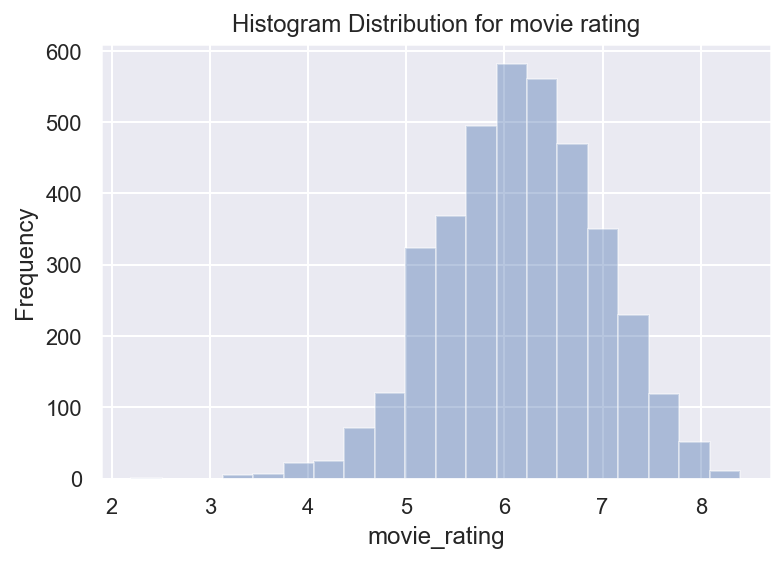

In [22]:
# Plotting and formatting the distribution of movie_rating
plt.figure(figsize=(6,4))
sns.set(style='darkgrid')
sns.distplot(df.movie_rating, kde=False, bins=20)
plt.title('Histogram Distribution for movie rating')
plt.ylabel('Frequency');

The distribution for movie ratings is quite nicely shaped, close to being normally distributed around a movie score of 6, with the minimum close to 3.2 and max around 8.5.

Now, let's visualize the relationships between movie rating and the other features that we are comparing it to, to try and see which variables are correlated with high movie ratings.

**Visualizing relationships between movie rating and 'popularity', 'release_year' and 'revenue_adj'**

Let's now create scatter plots to visualize the relationships between our target variable and the independent variables, to better understand the data and quickly spot any obvious or interesting correlations.

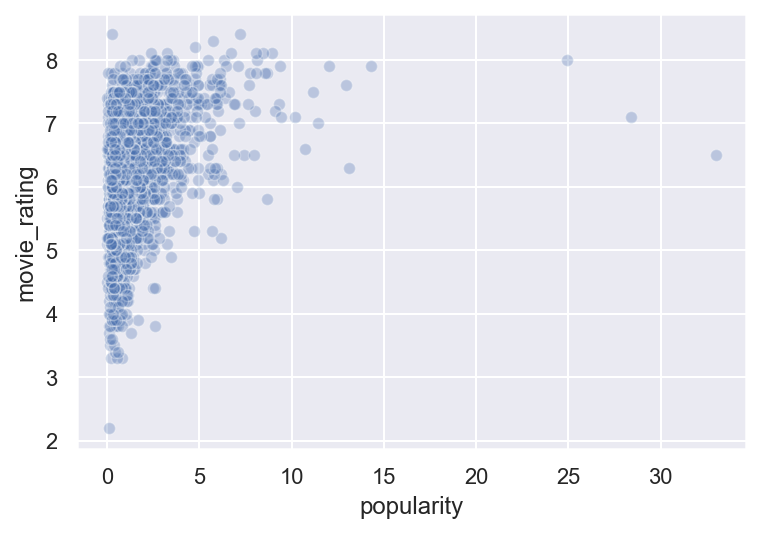

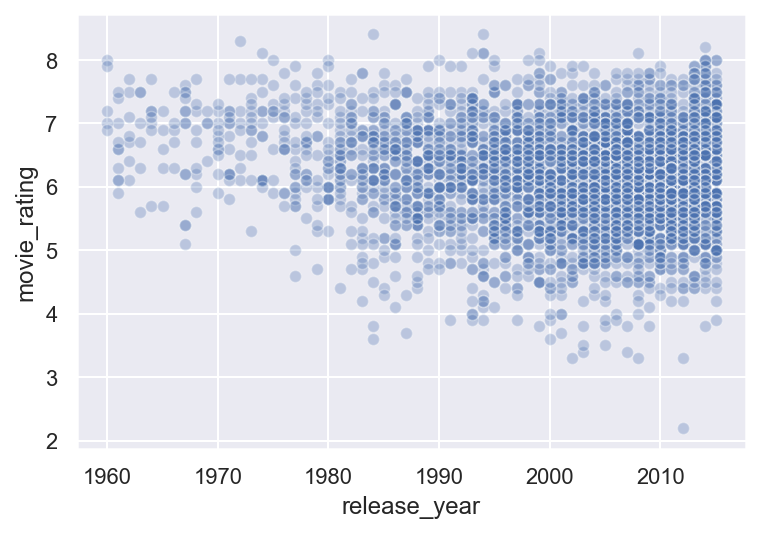

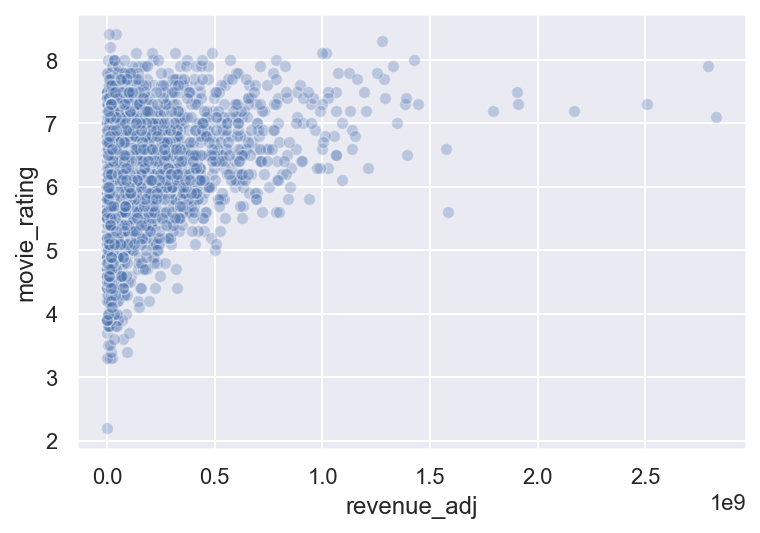

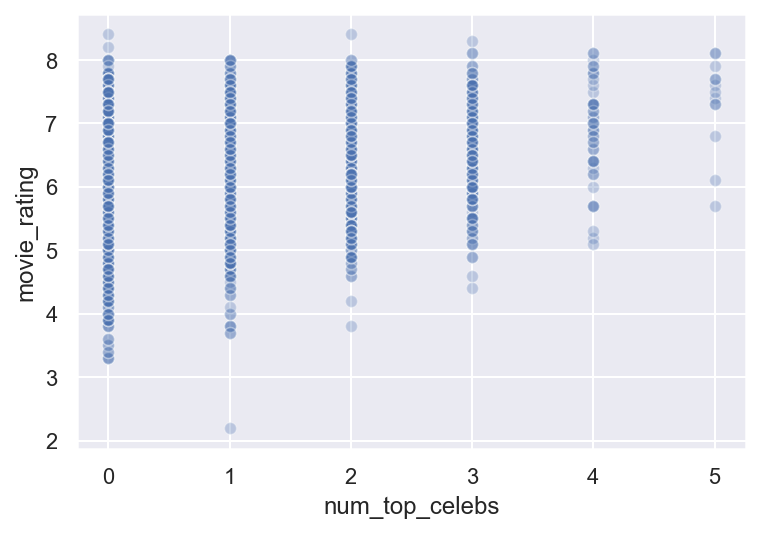

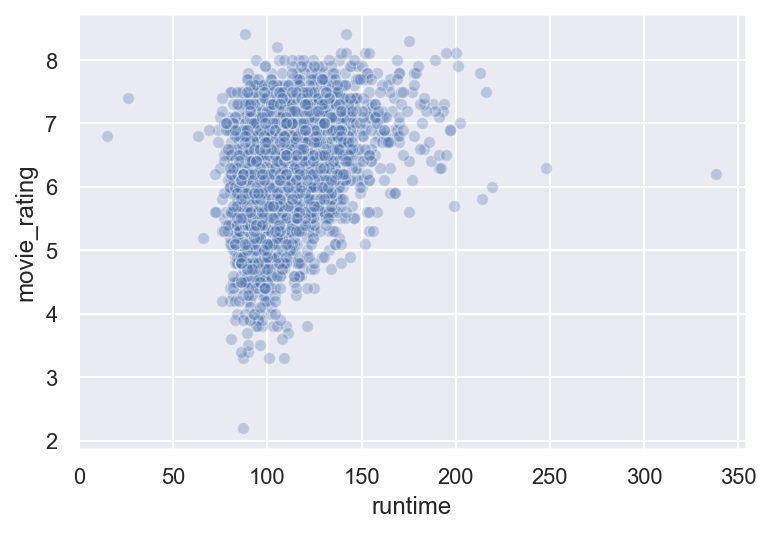

In [23]:
# Plotting scatterplots of the vote_average against each of the interesting features previously defined
features = ['popularity', 'release_year', 'revenue_adj', 'num_top_celebs', 'runtime'] 
sns.set(style='darkgrid')
for i in range(5):
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[features[i]], y=df['movie_rating'], alpha=0.3)

**Observations**:

- The data also supports the fact that in general, highly popular movies correspond to a movie being highly rated. However, this is by no means a requirement, as the data also shows that many not-so-popular movies have scored very high average user rating.
- There is a negative, weak correlation between a movie's release_year and its user rating. For example, the average movie rating for movies released before 1980 is higher than that for movies released more recently.
- Similarly to movie's popularity, there is a weak, yet positive correlation between a movie's revenue and its rating. However, I must note this correlation is weak and also not linear. This relationship just supports the fact movies that sold a lot have been highly rated, while those that didn't have a higher variability of movie ratings.
- There is definitely a positive trend between the number of top celebrities in a movie's cast and its rating. However, like the other relationships, this only shows that movies with more top celebrities, on *average*, have a higher rating, while movies with less top celebrities have, on *average*, lower ratings.

**Separating movie ratings into a 'high' and 'low' group**

Here, I will create and add another column to the dataframe that displays a label of 'high' or 'low', if the movie rating is above or below the median movie rating, respectively. This will allow me to more easily segment between the high and low rated movies in the dataset, which will help my analysis going forward.

In [24]:
# Add a new column to the dataframe, with each entry labeled 'high' if movie rating is higher than the median and 'low' if lower 
median_movie_rating = df.movie_rating.median()
df['movie_rating_level'] = df.movie_rating.apply(lambda x: 'high' if x > median_movie_rating else 'low')

Good, now let's quickly check if our new 'movie_rating_level' looks correct.

In [25]:
df[['movie_rating', 'movie_rating_level']].sort_values(by='movie_rating')

,movie_rating,movie_rating_level
4859,2.200,low
4115,3.300,low
3134,3.300,low
4540,3.300,low
7526,3.400,low
...,...,...
4177,8.100,high
650,8.200,high
7269,8.300,high
4178,8.400,high


**Computing summary statistics**

Here, I will compute summary statistics of all the independent variables for each of the two movie ratings groups. These will be useful to very clearly show any difference in central tendency between the two groups being compared.**

In [26]:
# Group the dataframe by the newly created column, and compute summary stats for each variable under investigation.
new_df = pd.DataFrame(df[['movie_rating_level', 'popularity', 'release_year', 'revenue_adj', 'num_top_celebs', 'runtime']])
summary_stats = new_df.groupby('movie_rating_level').agg(
    median_popularity=('popularity', 'median'),
    median_release_year=('release_year', 'median'),
    median_revenue=('revenue_adj', 'median'),
    mean_num_top_celebs=('num_top_celebs', np.mean),
    median_runtime=('runtime', 'median'))

In [27]:
summary_stats

,median_popularity,median_release_year,median_revenue,mean_num_top_celebs,median_runtime
movie_rating_level,,,,,
high,1.027,2003,85144065.809,1.023,113
low,0.689,2005,47884209.704,0.661,101


**Visualization of summary statistics**

In this section, I will perform some simple visualizations of the previously compared summary statistics as formatted plots, to conclude some key differentiators shared among the highly rated movies.

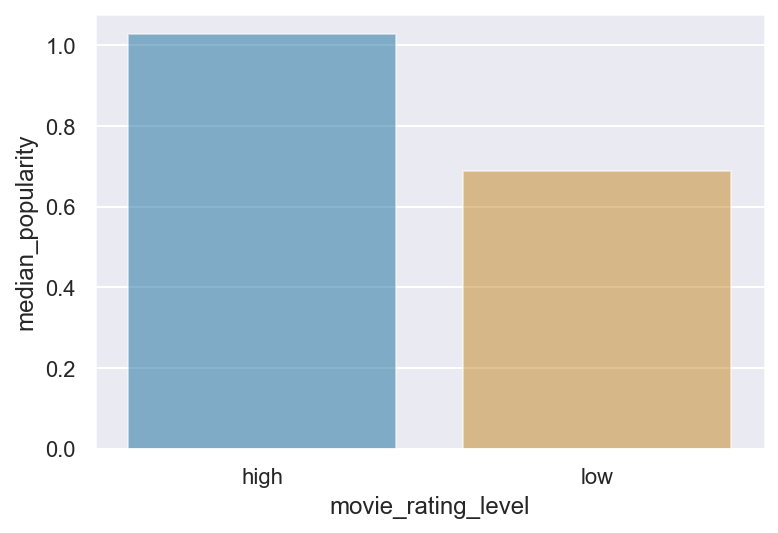

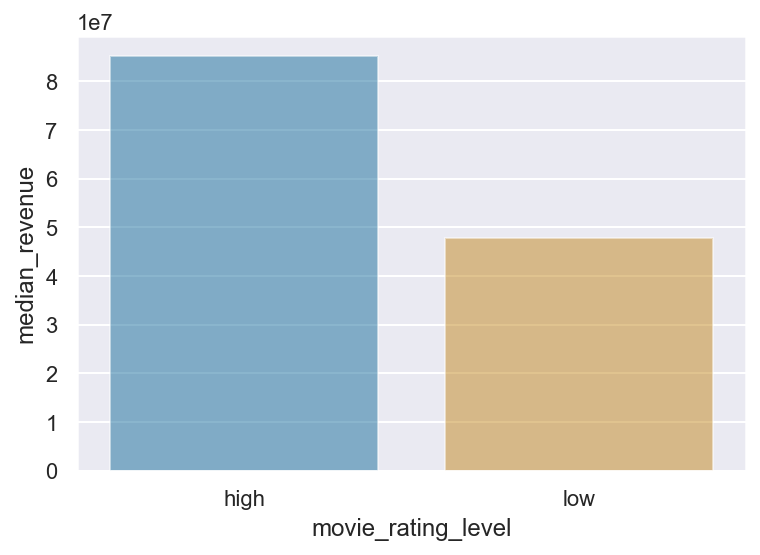

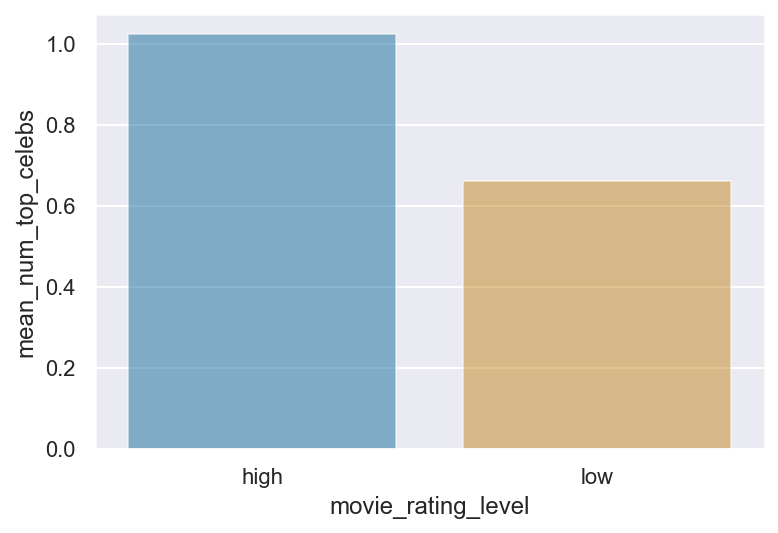

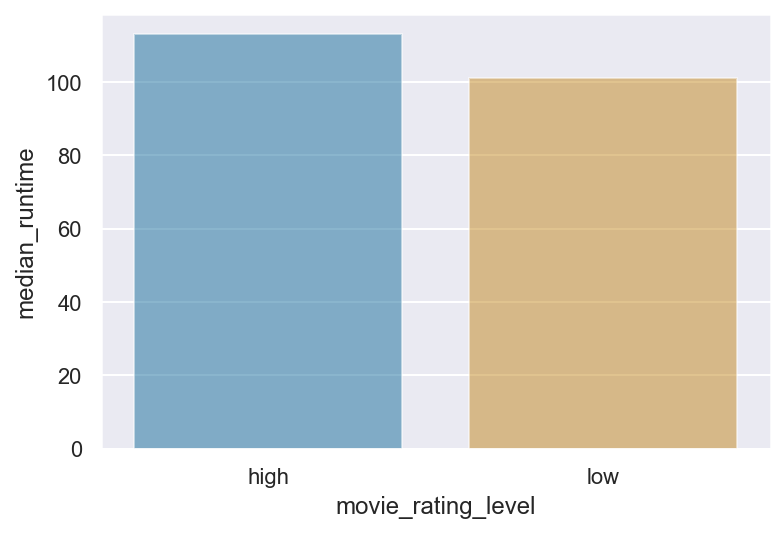

In [28]:
features = ['median_popularity', 'median_revenue', 'mean_num_top_celebs', 'median_runtime']
sns.set(style='darkgrid')
my_colors = sns.set_palette("colorblind")
for i in range(4):
    plt.figure(figsize=(6,4))
    sns.barplot(x=summary_stats.index, y=summary_stats[features[i]], alpha=0.5)   

**Observations:**

- First, it is important to note that out of the 5 variables we are analyzing around movie rating levels, only release year, number of top celebrities, and runtime can be considered independent variables, because those are the ones that film production companies can control and are not being affected by any other variables.

- As for a movie's accumulated 'revenue' and 'popularity', although they are not independent variables (because like user rating, they are the result of other variables), I have included them in this analysis because it is interesting to see if there are any interesting correlations between high revenue-earning and popular movies and their average user ratings.

- As expected, highly rated movies have, on average, almost double the amount of accumulated revenue as the lower rated counterparts. Similarly, the average popularity of highly rated movies is significantly higher than the lower rated ones.

- More interestingly, the data shows that highly rated movies have an average number of top celebrities at around 1.02, with their lower rated counterparts at around 0.66. This proves that indeed, movies with famous actors do tend to score higher user rating scores.

- Additionally, and perhaps more unexpectedly, higher rated movies show a lower median release_year and a higher movie runtime, of about 13 minutes higher. This, coupled with the scatterplots from earlier, indicate that older movies tended to have better user ratings, and that highly rated movies tend to be longer in runtime. 

### Q2. If maximizing profitability is the end goal, how can a movie improve its chances of success?

**1. Define variables to analyze.**

As with the first research question, I will start by defining what variables/factors we will need to analyze in order to best answer the given question.

For this question, we are asking primarily about a movie's profitability, so we know we will definitely be dealing with the 'revenue' and 'budget' columns. Also, we are asking what a movie should have to improves its chances of success, where success means being more profitable. Thus, let's identify a few interesting independent variables which are directly controlled by the film's producers. This way, we can focus our conclusion on what features of a film the producers should focus on if they want to maximize the movie's profitability.

In [29]:
df.head(2)

,id,popularity,original_title,num_top_celebs,director,runtime,genres,production_companies,release_date,vote_count,movie_rating,release_year,budget_adj,revenue_adj,movie_rating_level
0,135397,32.986,Jurassic World,1,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500,2015,137999939.280,1392445892.524,high
1,76341,28.420,Mad Max: Fury Road,2,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.100,2015,137999939.280,348161292.489,high


Based on the columns that we have available, a few independent variables that could provide interesting insights are 'num_top_celebs', 'director', 'runtime', 'release_date', as well as 'budget_adj' and 'revenue_adj'. Let these be all the initial, raw columns that will be needed throughout our exploration.

**2. Perform any required data transformations/aggregations**

**Create a new dataframe with only the variables being studied.**

To start off, I will create a new dataframe that will be the basis of analysis for this question.

In [30]:
# Create a new dataframe, df_2, a subset of the original 'df' dataframe
df_2 = df[['num_top_celebs', 'director', 'runtime', 'release_date', 'budget_adj', 'revenue_adj']]
df_2.head(2)

,num_top_celebs,director,runtime,release_date,budget_adj,revenue_adj
0,1,Colin Trevorrow,124,6/9/15,137999939.280,1392445892.524
1,2,George Miller,120,5/13/15,137999939.280,348161292.489


Good, now we have all the information that we will need for our analysis in a newly create dataframe. This will help with organization, as I won't have to deal with such a large dataset as the original one, and will instead be manipulating this smaller, more analysis-focused dataframe (df_2).

**Calculating a 'profit' column**

In this step, I need to think about, given the question I am trying to answer, how can I structure the given information in such a way that would be best for solving the problem at hand (answering the research question)?

The first and most obvious transformation that is required is to calculate a movie's profitability, given its budget and revenue. This will simply be a movie's accumulated revenue minus its budget.

*NOTE: Please keep in mind that defining a movie's profit as its revenue minus budget is a very simplistic model, that is likely and almost certain to be inaccurate. However, in this case, that is all the information we are given. This will be re emphasized and explained in the Limitations and Assumptions section of this report.*

In [31]:
# Creating a new 'profit' column for the dataframe, defined as a movie's revenue minus its budget.
df_2['profit'] = df_2['revenue_adj'] - df_2['budget_adj']

# Dropping the 'revenue_adj' and 'budget_adj' column, as they are now useless in our analysis
df_2 = df_2.drop(columns=['revenue_adj', 'budget_adj'])

# Display first 2 rows of the new dataframe
df_2.head(2)

/Users/danielreinaux/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,num_top_celebs,director,runtime,release_date,profit
0,1,Colin Trevorrow,124,6/9/15,1254445953.244
1,2,George Miller,120,5/13/15,210161353.209


Okay, I now have a 'profit' column for each movie. 

**Creating a 'release_month' column**

Considering the drivers of profitability for a movie, I think it would be interesting to see if there is any relationship between movie release month and its achieved profit. If we direct this thinking to our dataframe, we do have the date in which the movie was released, but we would like to get the month by itself. 

Let's extract a release month from the release date column and add it to our dataframe.

In [32]:
# Converting the 'release_date' from its original str type to a datetime data type
df_2['release_date'] = pd.to_datetime(df_2['release_date'])

# Extracting the release_month from the release_date and assigning it to a value in the dataframe
df_2['release_month'] = df_2['release_date'].dt.strftime('%b')

In [33]:
df_2.head()

,num_top_celebs,director,runtime,release_date,profit,release_month
0,1,Colin Trevorrow,124,2015-06-09,1254445953.244,Jun
1,2,George Miller,120,2015-05-13,210161353.209,May
2,1,Robert Schwentke,119,2015-03-18,170419069.936,Mar
3,4,J.J. Abrams,136,2015-12-15,1718723210.762,Dec
4,3,James Wan,137,2015-04-01,1210948878.382,Apr


We can see that the newly created 'release_month' column is working as expected. 

Let's now delete the release_date column as it no longer serves a purpose.

In [34]:
# Drop 'release_date' column from out dataframe
df_2 = df_2.drop(columns='release_date')

In [35]:
df_2.head(1)

,num_top_celebs,director,runtime,profit,release_month
0,1,Colin Trevorrow,124,1254445953.244,Jun


Okay, our dataframe now looks more appropriate for some interesting analysis.

**3. Explore and visualize relationships and patterns**

First, let's explore the profit distribution.

**Profit distribution**

In [36]:
df_2.profit.describe()

count         3805.000
mean      93996169.053
std      195033249.656
min     -413912431.000
25%       -1420000.000
50%       28513340.200
75%      109026621.437
max     2750136650.919
Name: profit, dtype: float64

There is a pretty high variability in the profit values, showing the median profit as around 28 million, maximum at 2.7 billion, and minimum at -413 million.

Next, let's explore each movie's profitability by looking at just 1 independent variable at a time, starting with director.

**Exploring profitability by director**

In [37]:
print(f'There are {df_2.director.nunique()} unique directors in our dataset.')

There are 1683 unique directors in our dataset.


Because so many directors would prove hard to visualize in a table or a chart, let's instead define and identify the top 10 most profitable directors.

Let's display the 10 most profitable directors by median profit.

In [38]:
# Display the top 10 most profitable movie directors (by median profit)
print('Top 10 directors with the highest median movie profit',df_2.groupby('director')['profit'].median().sort_values(ascending=False).head(10), sep='\n\n')

Top 10 directors with the highest median movie profit

director
Irwin Winkler                                       1551568265.276
Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman   1545635294.873
Richard Marquand                                    1182994737.989
Roger Allers|Rob Minkoff                            1093391569.736
Chris Buck|Jennifer Lee                             1052306488.209
Joss Whedon                                         1035032450.226
Kyle Balda|Pierre Coffin                             996112046.751
Andrew Stanton|Lee Unkrich                           913463541.160
Andrew Adamson|Kelly Asbury|Conrad Vernon            888736812.770
Lee Unkrich                                          863171911.000
Name: profit, dtype: float64


We can see that the list of the most profitable movie directors, with Irwin Winkler at first place with a median movie profit of 1.5 billion, is very different from the list of most famous directors.

Although this is a very interesting conclusion, please keep in mind that those directors with the highest median profit might not have more than one or two movie under their belt, which weakens the conclusion that they are the best bet to secure a high movie profitability.

To explore this further, let's examine how many movies these 10 most profitable directors have worked on (in this dataset).

In [39]:
# Extracting the list of the 10 most (highest median) profitable directors
directors_list = list(df_2.groupby('director')['profit'].median().sort_values(ascending=False).head(10).index)

# Displaying how many movies each of the above directors have worked on (in this dataset)
print('Number of movies per director',(df_2.director.value_counts())[directors_list], sep='\n\n')

Number of movies per director

Irwin Winkler                                        1
Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman    1
Richard Marquand                                     1
Roger Allers|Rob Minkoff                             1
Chris Buck|Jennifer Lee                              1
Joss Whedon                                          3
Kyle Balda|Pierre Coffin                             1
Andrew Stanton|Lee Unkrich                           1
Andrew Adamson|Kelly Asbury|Conrad Vernon            1
Lee Unkrich                                          1
Name: director, dtype: int64


As I thought, all but one of these top 10 most profitable directors have only directed one movie (from this dataset). 

This indicates that these directors could have had one very successful movie and nothing more, which weakens the conclusion that these directors would be the best bet if we are aiming for a highly profitable movie. However, it is still proof that these directors do have the highest *median* movie profitability.

Out of curiosity and to deepen our exploration in this dimension, let's display the 10 most profitable movie directors by profit *sum* of all their directed movies.

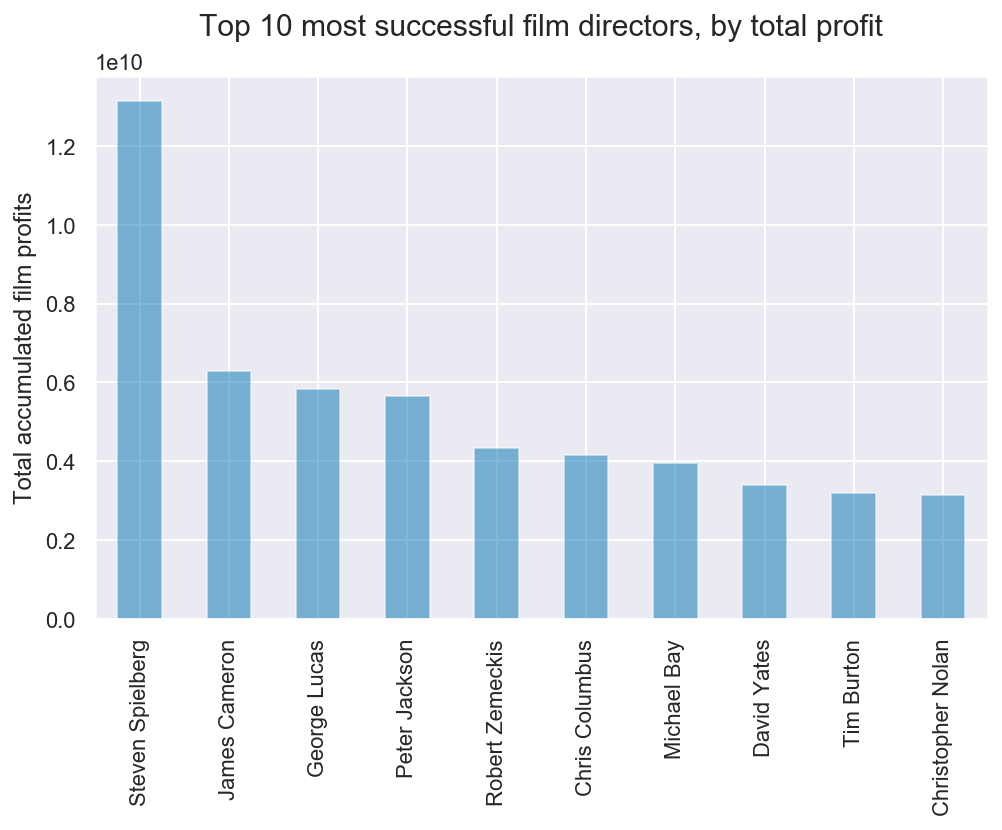

In [40]:
# top 10 most profitable directors, by sum of movie profits
plt.figure(figsize=(8,5))
df_2.groupby('director')['profit'].sum().sort_values(ascending=False).head(10).plot(
kind='bar', alpha=0.5)
plt.title('Top 10 most successful film directors, by total profit', fontsize=15, pad=20)
plt.xlabel('')
plt.ylabel('Total accumulated film profits');

In [41]:
# Extracting the list of the 10 most (highest profit sum) profitable directors
directors_list = list(df_2.groupby('director')['profit'].sum().sort_values(ascending=False).head(10).index)

# Displaying how many movies each of the above directors have worked on (in this dataset)
(df_2.director.value_counts())[directors_list]

Steven Spielberg     27
James Cameron         8
George Lucas          6
Peter Jackson        11
Robert Zemeckis      15
Chris Columbus        9
Michael Bay          11
David Yates           4
Tim Burton           16
Christopher Nolan     8
Name: director, dtype: int64

Not surprisingly, the top-10 list above is very different from the top 10 most profitable by median profit.

However, it can be argued that this new list gives a more sober and trustworthy representation of the most profitable and successful directors.

As we can see, each of these top 10 directors have directed multiple movies. This, combined with the fact that they have the highest profit by sum, proves that they have a well-supported track record of success. Thus, for a film producer, these directors might be better bets to hire for movie if our aim is to ensure high movie profitability and overall success.

**Exploring movie profitability by release month**

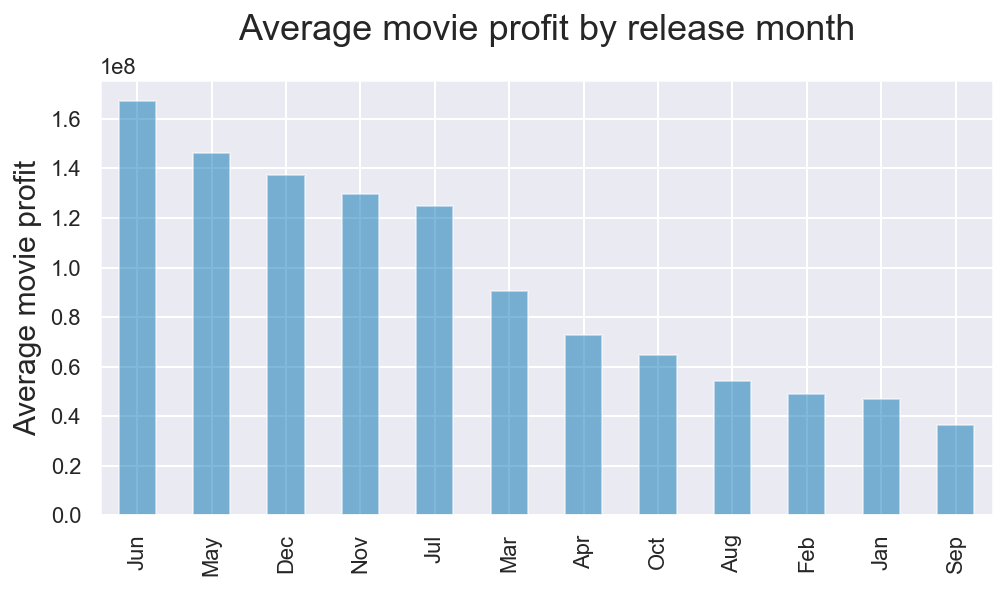

In [42]:
# Displaying mean movie profit by month, sorted in descending order
df_2.groupby('release_month')['profit'].mean().sort_values(ascending=False).plot(
    kind='bar', alpha=0.5, figsize=(8,4))
plt.title('Average movie profit by release month', fontsize=18, pad=20)
plt.xlabel('')
plt.ylabel('Average movie profit', fontsize=15);

From this plot, we can see that on average, movies have turned a higher profit when they have been released either in the middle or the end of the year. This makes sense, as summer and end-of-year are periods of higher consumer expenditure on entertainment.

This suggests that to maximize chances of movie profitability, the producer should release the movie either in May, June, or December.

**Exploring profitability by movie runtime**

In [43]:
# Creating a new 'profit_level' column in a dataframe that has a 'high' or 'low' movie profit label
df_2['profit_level'] = df_2.profit.apply(lambda x: 'high' if x > df_2.profit.median() else 'low')

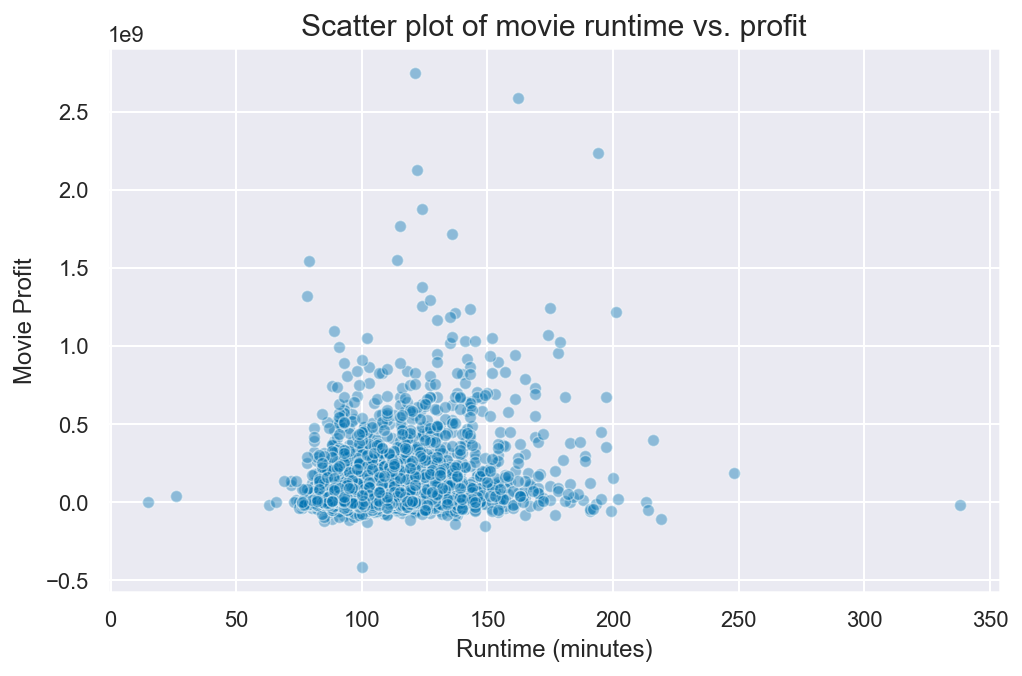

In [44]:
# Plotting scatterplot of movie runtime vs. profit, with formatting 
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_2.runtime, y=df_2.profit, alpha=.4)
plt.title('Scatter plot of movie runtime vs. profit', fontsize=15)
plt.xlabel('Runtime (minutes)', fontsize=12)
plt.ylabel('Movie Profit');

There does not seem to be any meaningful correlation between a movie's runtime and its profit, so there are no critical suggestions in this dimension.

To make sure, let's compare the median movie runtime for high and low profit movies.

In [45]:
# Finding the average runtime for each level of profit
df_2.groupby('profit_level')['runtime'].mean()

profit_level
high   112.446
low    106.257
Name: runtime, dtype: float64

It seems like highly profitable movies tend to have a little bit a of a longer runtime than those that had a 'low' profit.

However, rather than giving a direct suggestion on what a movie's runtime should be, I think it's wiser to just make sure the movie's project is the best it can be, and making sure the runtime is not shorter than 100 minutes.

**Exploring relationship between movie profitability and its number of top celebrities**


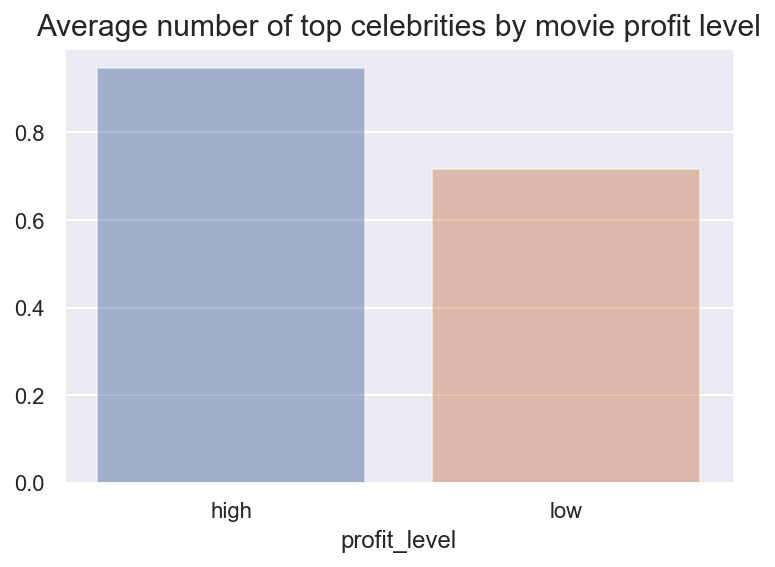

In [46]:
# Grouping by profit level and finding the average number of top celebrities for each group
groups = df_2.groupby('profit_level')['num_top_celebs'].mean()

# Plotting the above results
sns.set(style='darkgrid')
sns.barplot(x=groups.index, y=groups.values, alpha=0.5)
plt.title('Average number of top celebrities by movie profit level', fontsize=15);

As we can see, this simplistic model does show that on average, highly profitable movies have a higher number of top celebrities than those with lower profitability.

However, to see this relationship in more granular levels, let's plot the number of top celebrities' distribution for each movie profitability level.

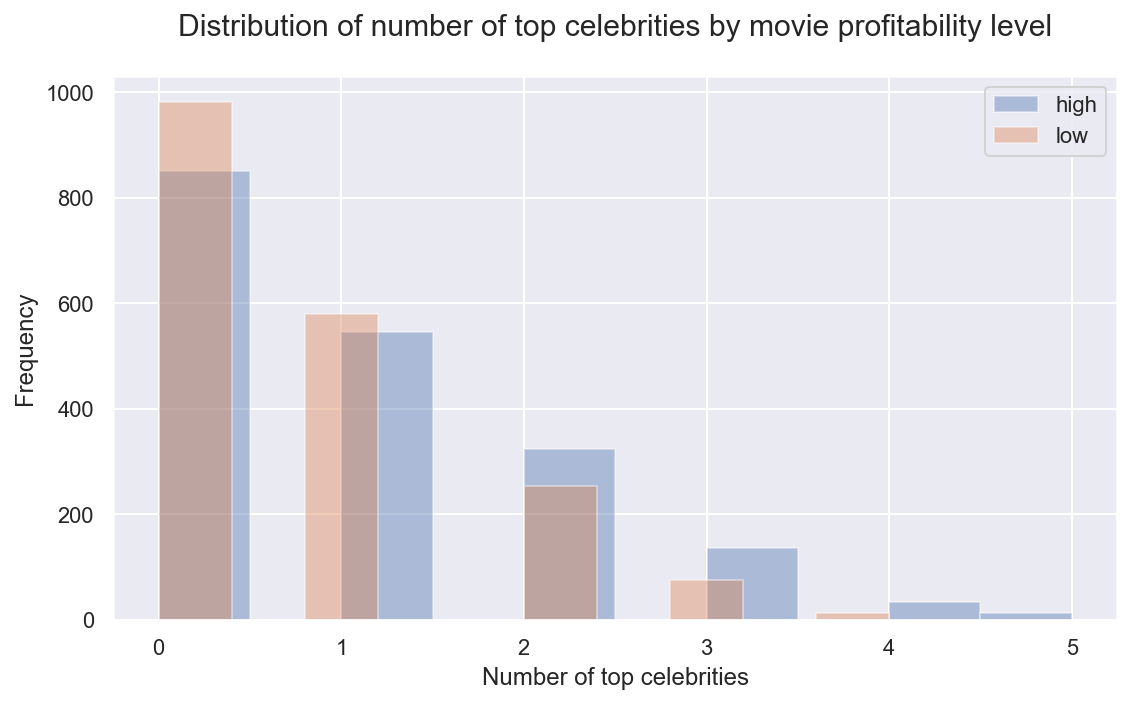

In [47]:
# Plotting the distribution of 'number of top celebrities' for each profit level
plt.figure(figsize=(9,5))
df_2[df_2.profit_level == 'high'].num_top_celebs.plot(kind='hist', alpha=0.4, label='high')
df_2[df_2.profit_level == 'low'].num_top_celebs.plot(kind='hist', alpha=0.4, label='low')
plt.legend()
plt.title('Distribution of number of top celebrities by movie profitability level', fontsize=15, pad=20)
plt.xlabel('Number of top celebrities', fontsize=12);

Although the difference is not major, the data does show that in general, movies with a more famous cast has more chances of being profitable. The result here is rather intuitive, but it is suggested that movies capture at least 2 top celebrities if it wants to maximize its (chances of) profitability.

<a id='conclusions'></a>
## Conclusions

**Assumptions and Limitations**

Before jumping to the main conclusions of the analysis, I will go over some key assumptions and limitations of this study.

1. The study assumes that the 3,800 movies being analyzed are a good representation of the entire film industry.
2. When defining how many members of a movie cast were considered a 'top celebrity', I checked whether each member were present in a list of the 200 most famous actors and actresses as identified by an imdb user. This might have excluded some very famous actors and included some not-so-famous ones, but I though it was a good enough list for its purpose.
3. Because a movie can have many different genres, genre was not included as part of the analysis. For a more critical project, this could have been implemented, but for the purpose of this brief study it was not worth the addded complexity.
4. This study assumed that a movie's revenue minus its budget represents its bottomline profit, which is likely not accurate, as the film industry especially hollywood has more cost intricacies related to its movies.
5. It is important to remember that all of the conclusions achieved in this study cannot state any causality. Rather, the conclusions are recommendations to maximize the *chances* of success (2nd research question).

**Key Insights**

*Q1*: Regarding the first research question, *What are shared characteristics of highly rated movies*, I have found that movies with a more famous cast are correlated with a higher average user rating. This proves the intuition that top celebrities tend to work on high-quality movies (or that they make the movies high-quality themselves). Additionally, the data showed that old movies, specifically those release before 1980, had a much higher average rating than those release more recently.

*Q2*: Pertaining to the second research question of *what a movie can do to improve its chances of success if its goal is to maximize profit*, there were a couple of interesting conclusions to be made. Firstly, a film production company should aim to hire one of Steven Spielberg, James Cameron, George Lucas, Peter Jackson, Robert Zemeckis, Chris Columbus, Michael Bay, David Yates, Tim Burton, or Christopher Nolan. This is because these are the directors with the highest total film profit, which is an accurate measure of consistent, positive track record (profit). Secondly, the producers should aim to release the film either on the middle or the end of the year. Ideally, on the month of June, which has shown historically to be the best month, on average, for movie profits. Lastly, and more intuitively, the data does prove that having a higher number of top celebrities in the movie cast improves its chances of having high profitability. Thus, I recommend attempting to pull at least 2 top celebrities and keeping the movie runtime above 100 minutes, as the data also showed a slight preference for longer movies.
